**<h1 align="center">PROYECTO INDIVIDUAL 2</h1>**
<h1 align="center"> EDA (Exploratory Data Analysis)</h1>

Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpt
import matplotlib_inline as mpi
import matplotlib.pyplot as plt

Leemos archivo

In [2]:
df = pd.read_csv('Homicidios.csv')

Creamos una nueva columna denominada 'SEMESTRE' extrayendo el semestre de la columna 'FECHA'

In [3]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['SEMESTRE'] = df['FECHA'].apply(lambda x: '1' if x.month < 7 else '2' )
df['SEMESTRE'] = df['SEMESTRE'].astype('int64')

Calculamos el indice de variabilidad de la columna 'EDAD' para ver que tecnica estadistica implementamos, ya que cambiamos los valores de SD por NaN

In [4]:
df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')
media = df['EDAD'].mean()
std_dev = df['EDAD'].std()
Indice_variabilidad = (std_dev / media) * 100
print(Indice_variabilidad)

46.768240791335096


Como el indice de variabilidad de la columna 'EDAD' es de 46.76% entonces utilizaremos la mediana para rellenar los valores nulos de la columna 'EDAD'

In [5]:
mediana = df['EDAD'].median()
df['EDAD'] = df['EDAD'].fillna(mediana)
df['EDAD'] = df['EDAD'].astype('int64')

Ahora cambiamos los valores de SD en la columna 'SEXO' por NaN y usamos la moda para reemplazar los valores NaN

In [6]:
df['SEXO'] = df['SEXO'].astype(str)
df['SEXO'] = df['SEXO'].replace('Sd', np.nan)
moda = df['SEXO'].mode()[0]
df['SEXO'] = df['SEXO'].fillna(moda)

Ahora cambiamos los valores de SD en la columna 'LUGAR_DEL_HECHO' por NaN y usamos la moda para reemplazar los valores de NaN

In [7]:
df['LUGAR_DEL_HECHO'] = df['LUGAR_DEL_HECHO'].astype(str)
df['LUGAR_DEL_HECHO'] = df['LUGAR_DEL_HECHO'].replace('Sd', np.nan)
moda = df['LUGAR_DEL_HECHO'].mode()[0]
df['LUGAR_DEL_HECHO'] = df['LUGAR_DEL_HECHO'].fillna(moda)

Debido a que se cambio el valor de NaN por el valor de la moda en la columna 'LUGAR_DEL_HECHO', se debe cambiar el valor de 0 en la columna 'COMUNA' que aparecia en dicha fila por el valor de 8 que corresponde

In [8]:
df['COMUNA'] = df['COMUNA'].replace(0, 8)

Realizamos graficos para analisis bivariado y multivariado

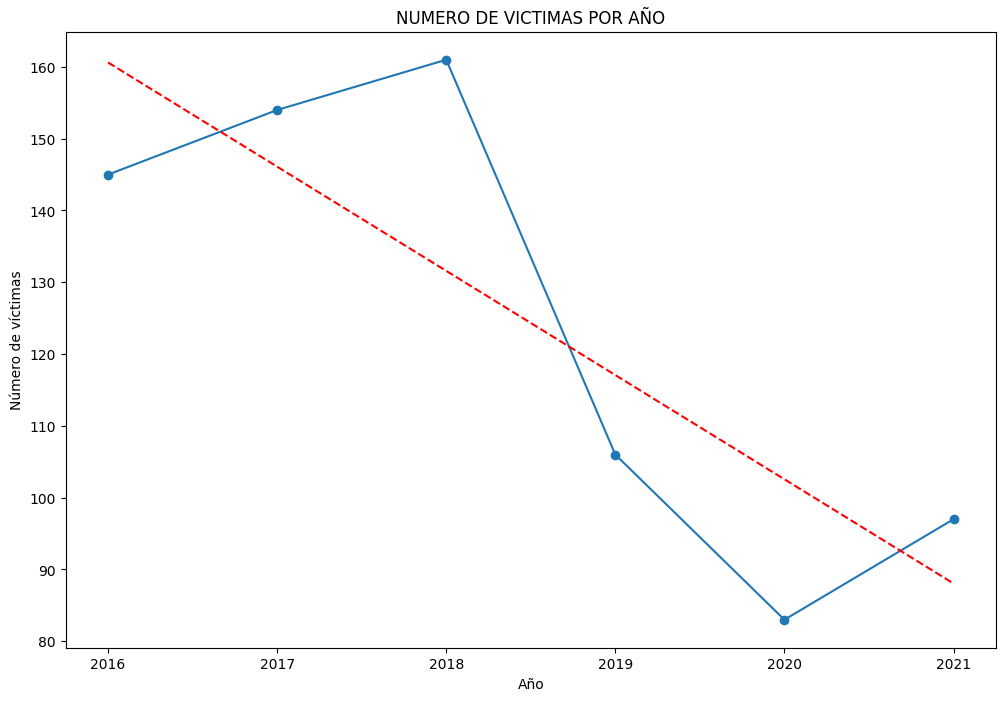

In [9]:

victimas_por_año = df.groupby('AAAA')['N_VICTIMAS'].sum()
plt.figure(figsize=(12, 8))
plt.plot(victimas_por_año.index, victimas_por_año.values, 'o-')
z = np.polyfit(victimas_por_año.index, victimas_por_año.values, 1)
p = np.poly1d(z)
plt.plot(victimas_por_año.index, p(victimas_por_año.index), "r--") 
plt.title('NUMERO DE VICTIMAS POR AÑO')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.show()

**<p>Análisis de la Gráfica 1:</p>**
<p>Tendencia Temporal:</p>
<p>El gráfico presenta información desde 2016 hasta 2021, lo que permite analizar la evolución temporal en la cantidad de víctimas. Se aprecia una disminución en el número de víctimas desde 2018 hasta 2021, luego de un pico registrado en 2018.</p>
<p>Alza en 2018:</p>
<p>El año 2018 resalta como el periodo con el mayor número de víctimas, alcanzando un total de 161. Sería interesante indagar las razones detrás de este notable aumento en comparación con años anteriores y posteriores.</p>
<p>Disminución en 2019 y 2020:</p>
<p>En 2019, el número de víctimas se redujo a 106, y en 2020 disminuyó aún más a 83. Estos datos podrían señalar una tendencia a la baja en la cantidad de víctimas durante estos dos años. Las razones de la disminución puede referirse a la medidas de contigencia debido a la Pandemia de COVID-19.</p>
<p>Aumento en 2021:</p>
<p>Sin embargo, en 2021 se registró un repunte en el número de víctimas, alcanzando un total de 97. Resulta interesante explorar las razones detrás de esta inversión en la tendencia a la baja después de dos años de declive.</p>
<p>Posibles Factores Influyentes:</p>
<p>Para un análisis más completo, sería beneficioso considerar potenciales factores que pudieron influir en las variaciones del número de víctimas a lo largo de estos años. Algunos factores relevantes podrían ser políticas gubernamentales, cambios económicos o medidas de seguridad, entre otros.</p>


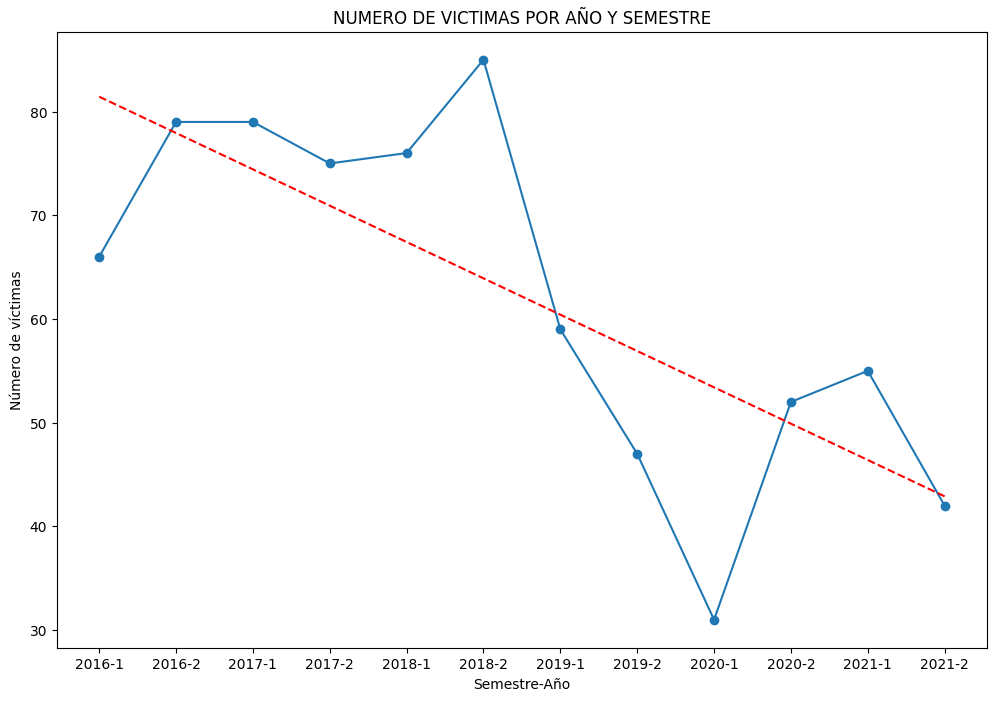

In [10]:
victimas_semestre = df.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum()
victimas_semestre.index = victimas_semestre.index.map(lambda x: f'{x[0]}-{x[1]}')
plt.figure(figsize=(12, 8))
plt.plot(victimas_semestre.index, victimas_semestre.values, 'o-')
w = np.polyfit(range(len(victimas_semestre)), victimas_semestre.values, 1)
t = np.poly1d(w)
plt.plot(victimas_semestre.index, t(range(len(victimas_semestre))), "r--")
plt.title('NUMERO DE VICTIMAS POR AÑO Y SEMESTRE')
plt.xlabel('Semestre-Año')
plt.ylabel('Número de víctimas')
plt.show()

**<p>Análisis de la Gráfica 2</p>**
<p>Tendencia Temporal:</p>
<p>La gráfica muestra información desde el semestre 1 del año 2016 hasta el semestre 2 del año 2021, lo que permite analizar el comportamiento de la cantidad de victimas a través del tiempo (semestre y año). Se observa el aumento en el semestre 2 del año 2016, luego una disminución hasta el semestre 2 del año 2017, luego un aumento hasta el semestre 2 del año 2018 y una caida hasta el semestre 2 del año 2021.</p>
<p>Disminución 2019 y 2020:</p>
<p>Vemos como en el semestre 1 del año 2019 empieza a disminuir la cantidad de victimas hasta el semestre 2 del año 2020, pasando de 59 victimas a 52, pero se observa también que la disminución principal fue entre el semestre 1 del año de 2019 al semestre 1 del año 2020, pasando de 59 victimas a 31. Lo anterior nos da una idea más clara acerca del tiempo de aplicación de las medidas para la reinserción de la población de CABA a su economia habitual después de pasar las medidas preventivas del COVID-19.</p>
<p>Aumento 2021:</p>
<p>Vemos que en el año 2021 tuvo nuevamente un alza principalmente en el semestre 1, esto junto con el aumento presentado en el semestre 2 del 2020, vemos que las medidas de reinserción se fueron dando de manera periodica. Aunque en el semestre 2 del año 2021 volvio a disminuir la cantidad de victimas, lo cual nos deja incertidumbre de las causas que provocaron esta disminución.</p>

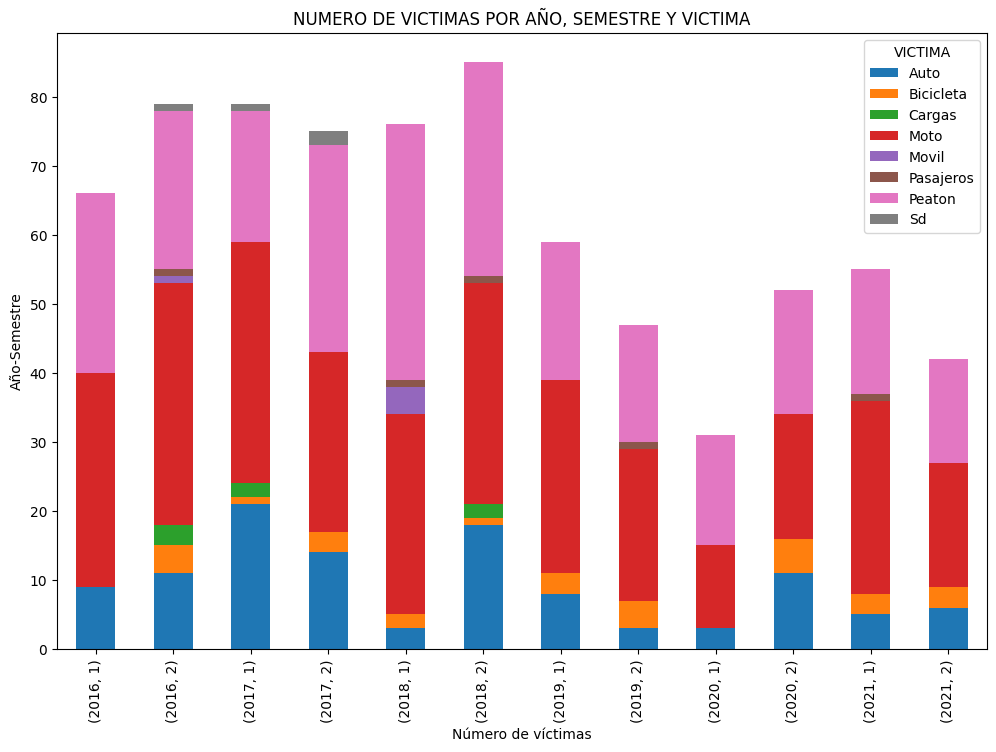

In [12]:
promedio_victimas = df.groupby(['AAAA', 'SEMESTRE', 'VICTIMA'])['N_VICTIMAS'].sum().unstack()
promedio_victimas.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y VICTIMA')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()


**<p>Análisis de la Gráfica 3</p>**
<p>Tendencia Temporal:</p>
<p>La gráfica muestra los datos de cantidad de victimas por semestre y año según la victima, donde se observa la tendencia a la baja como en las anteriores gráficas entre los años 2019 y 2020 y una pequeña alza en el año 2021.<p>
<p>Victimas:</p>
<p>Se observa en la gráfica que la mayor cantidad de victimas de siniestros viales le suceden a los peatones y motos como se ve en la distribución del comportamiento a través de los semestres de cada año. Esto se debe a que falta politicas gubernamentales y educación vial para fortalecer el cuidado con este tipo de victimas. También se observa que las victimas con menos numero de vicitimas son bicicletas y cargas, esto se debe a que existen ciclovias que permiten el transporte cuidadoso de personas que utilizan bicicletas.</p>

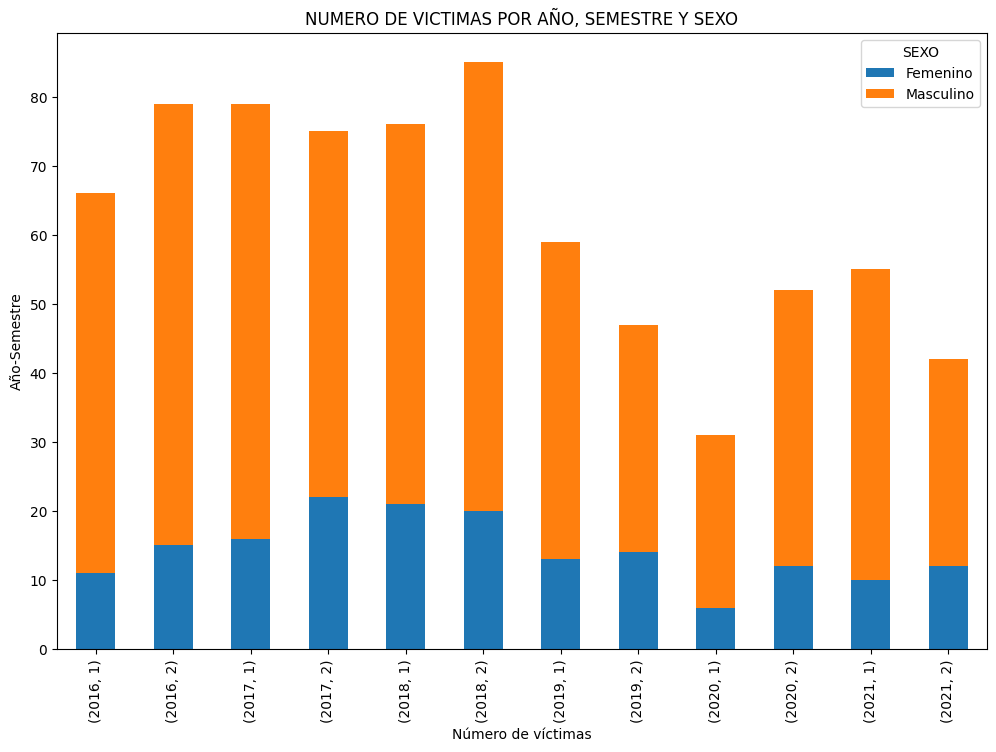

In [13]:
numero_victimas_año = df.groupby(['AAAA', 'SEMESTRE', 'SEXO'])['N_VICTIMAS'].sum().unstack()
numero_victimas_año.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y SEXO')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()


**<p>Análisis de la Gráfica 4</p>**
<p>Tendencia Temporal:</p>
<p>Esta gráfica presentan información relacionada con el número de victimas por semestre y año para tipo de sexo, en el cual vemos la misma tendencia de número de victimas a través del paso del tiempo, habiendo una tendencia a la baja a pesar de las alzas presentadas en el año 2018 en los semestre 1 y 2, en el año 2020 en el semestre 2 y el año 2021 en el semestre 1.</p>
<p>Sexo:</p>
<p>Como se puede observar la mayor cantidad de victimas son presentados en hombres y la menor cantidad en mujeres, esto puede deberse a la relación que existe entre la población de hombres y mujeres presentes en la Ciudad Autonoma de Buenos Aires.</p>

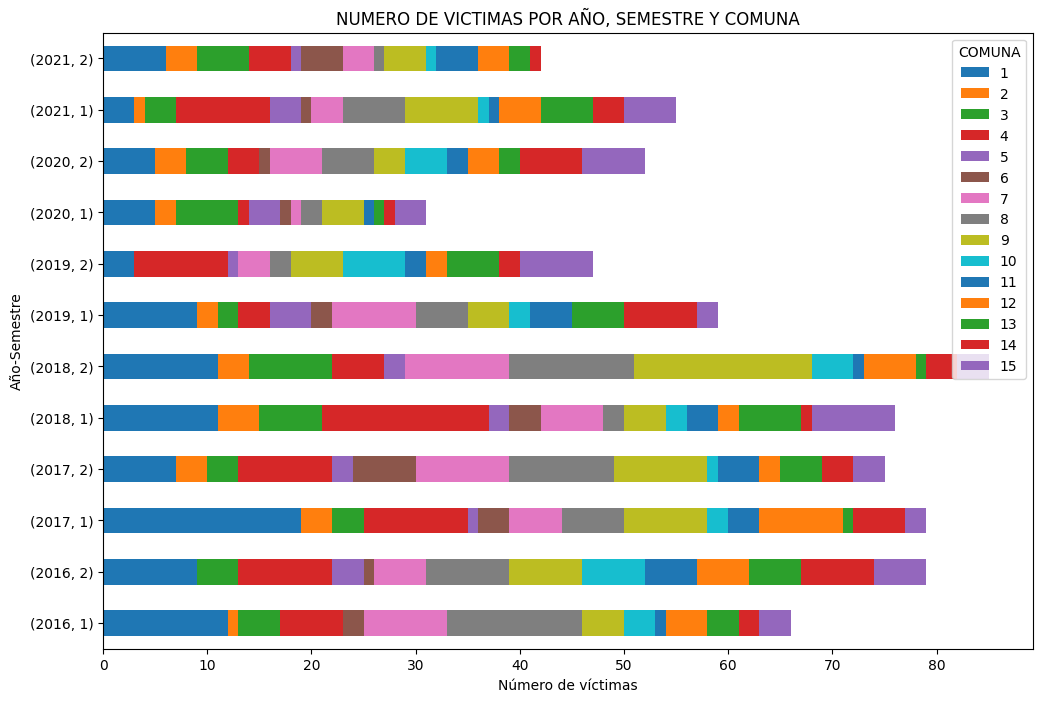

In [14]:
victimas_comuna = df.groupby(['AAAA', 'SEMESTRE', 'COMUNA'])['N_VICTIMAS'].sum().unstack()
victimas_comuna.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y COMUNA')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()

**<p>Análisis de la Gráfica 5</p>**
<p>Tendencia Temporal:</p>
<p>En esta gráfica se presenta información relacionada con el número de victimas por semestre y año para cada comuna existente en la Ciudad Autonoma de Buenos Aires, donde se ve la misma tendencia a la baja como se presenta en las anteriores gráficas.
<p>Comuna:</p>
<p>Como se denota la Comuna que tiene la mayor cantidad de victimas es la Comuna 1, presentando un promedio aproximado de 10 victimas para el semestre 1 de todos los años y un promedio de 7 victimas para el semestre 2 de todos los años; seguido de la Comuna 8 la cual tiene un promedio de 6 para el semestre 1 de todos los años y un promedio de 6 para el semestre 2 de todos los años, esto puede deberse a la proporcion geográfica que contiene cada comuna.

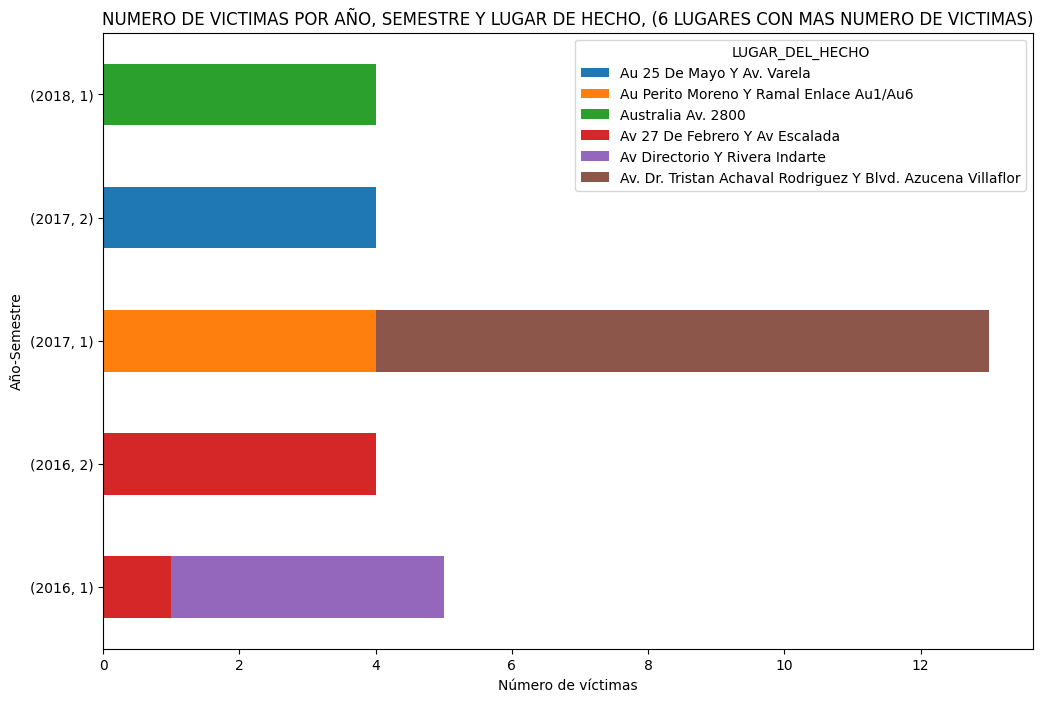

In [15]:
total_victimas_por_lugar = df.groupby('LUGAR_DEL_HECHO')['N_VICTIMAS'].sum()
top_lugares = total_victimas_por_lugar.nlargest(6).index
df_top_lugares = df[df['LUGAR_DEL_HECHO'].isin(top_lugares)]
victimas_lugar = df_top_lugares.groupby(['AAAA', 'SEMESTRE', 'LUGAR_DEL_HECHO'])['N_VICTIMAS'].sum().unstack()
victimas_lugar.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y LUGAR DE HECHO, (6 LUGARES CON MAS NUMERO DE VICTIMAS)')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()

**<p>Análisis de la Gráfica 6</p>**
<p>Tendencia Temporal:</p>
<p>En la gráfica se presenta información relacionada con el número de victimas por semestre y año para el lugar del hecho, pero debido a que los valores únicos para lugar del hecho eras bastantes, se presentan principalmente los 6 lugares con mayor cantidad de victimas. Y la tendencia es muy dispersa debido que en todos semestres de cada año no hay un patron repetitivo de lugar del hecho.</p>
<p>Lugar del hecho:</p>
<p>Podemos ver que el lugar más representativo a nivel general es la Av.Dr.Tristan Achaval con un número de victimas de 8, pero también se observa que cada año tiene un lugar especifico con la mayor cantidad de victimas.</p>

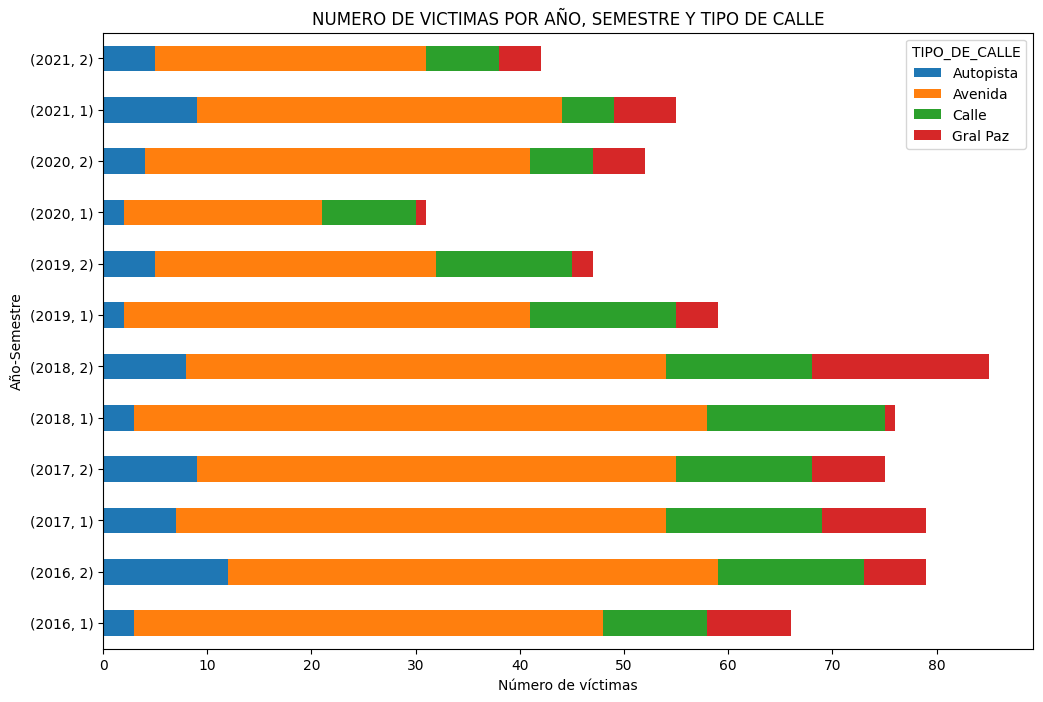

In [16]:
victimas_calle = df.groupby(['AAAA', 'SEMESTRE', 'TIPO_DE_CALLE'])['N_VICTIMAS'].sum().unstack()
victimas_calle.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y TIPO DE CALLE')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()

In [22]:
victimas_calle

TIPO_DE_CALLE  Autopista  Avenida  Calle  Gral Paz
AAAA SEMESTRE                                     
2016 1                 3       45     10         8
     2                12       47     14         6
2017 1                 7       47     15        10
     2                 9       46     13         7
2018 1                 3       55     17         1
     2                 8       46     14        17
2019 1                 2       39     14         4
     2                 5       27     13         2
2020 1                 2       19      9         1
     2                 4       37      6         5
2021 1                 9       35      5         6
     2                 5       26      7         4

**<p>Análisis de la Gráfica 7</p>**
<p>Tendencia Temporal:</p>
<p>La gráfica presenta información relacionada con la cantidad de victimas presentadas por semestre y año para el tipo de calle, aca se presenta el mismo patron de tendencia que las gráficas anteriores.</p>
<p>Tipo de Calle:</p>
<p>Vemos que el tipo de Calle con mayor cantidad de victimas a través de los semestres y años es Avenida, teniendo para el semestre 1 del año 2018 una cantidad de 55 victimas que es el valor mas representativo de todos los años y semestre. Es una incertidumbre saber a precisión la causa por la cual en este tipo de calle sucede la mayor cantidad de victimas por siniestros viales pero se pueden realizar algunas hipotesis vagas de ellas, como por ejemplo el exceso de velocidad, aumentado a la falta de semefaros en los cruces o reductores de velocidad en zonas estrategicas.</p>

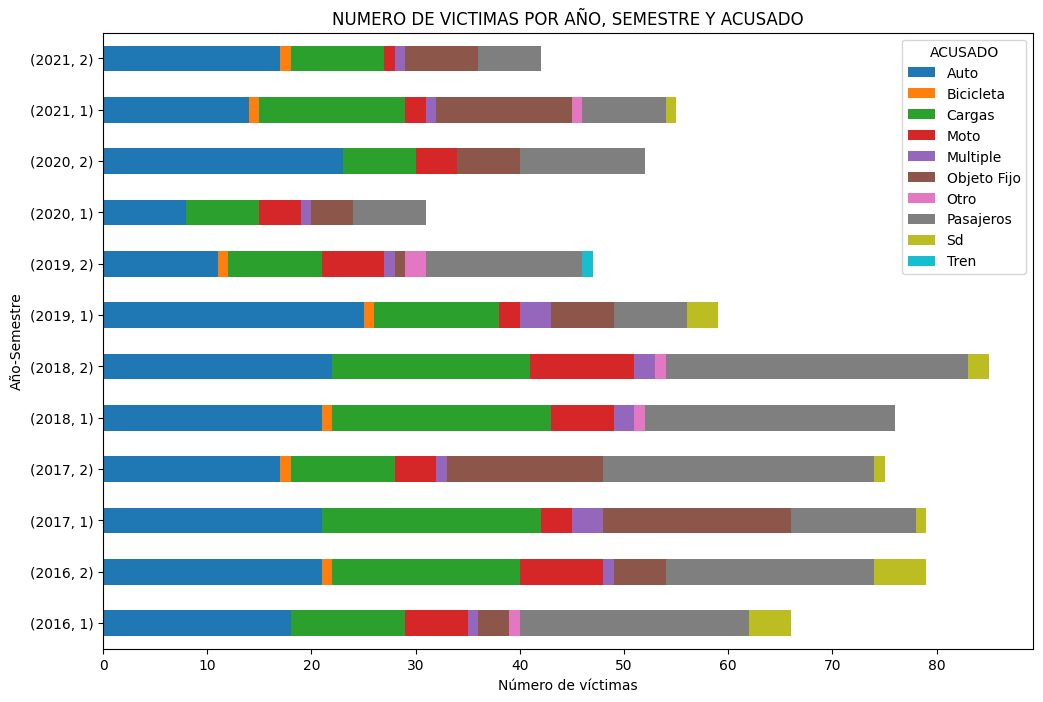

In [17]:
victimas_acusado = df.groupby(['AAAA', 'SEMESTRE', 'ACUSADO'])['N_VICTIMAS'].sum().unstack()
victimas_acusado.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y ACUSADO')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()

**<p>Análisis de la Gráfica 8</p>**
<p>Tendencia Temporal:</p>
<p>En la gráfica se presenta información relacionada con la cantidad de victimas por semestre y año para el tipo de acusado, aca se presenta el mismo patrón de tendencia que en las anteriores gráficas, siendo una tendencia a la baja con el pasar de los semestres y año.</p>
<p>Acusado:</p>
<p>Como podemos observar en la gráfica la mayor cantidad de victimas para el tipo de acusado es para los Pasajeros, seguido de Auto y Cargas. La noción del por qué los Pasajeros causan la mayor cantidad de victimas es incerta, pero para el caso de Auto es puede deberse de forma vaga a que auto va a exceso de velocidad o es el ejecutante de una mala maniobra causante del siniestro vial.</p> 

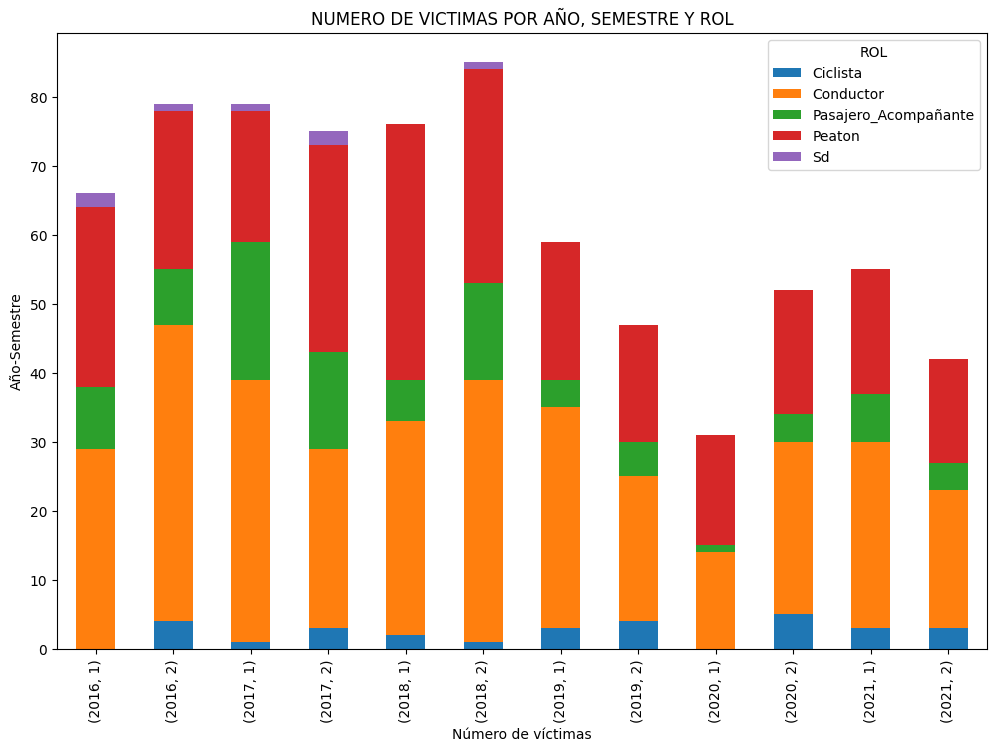

In [18]:
victimas_rol = df.groupby(['AAAA', 'SEMESTRE', 'ROL'])['N_VICTIMAS'].sum().unstack()
victimas_rol.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y ROL')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()

**<p>Análisis de la Gráfica 9</p>**
<p>Tendencia Temporal:</p>
<p>En esta gráfica se presenta la información relacionada con la cantidad de victimas por semestre y año por cada rol. Se resalta nuevamente que la tendencia responde al mismo patrón de tendencia de gráficas anteriores.</p>
<p>Rol:</p>
<p>Como se denota en la gráfica el rol al que se le deben la mayor cantidad de victimas de siniestros viales corresponde a Conductor, esto se puede deber a el comportamiento humano, es decir, intrinseco al tipo de vehiculo; como por ejemplo a que el conductor haya ingerido bebidas embriagantes, que haya aumentado la velocidad mayor a la máxima permitidad entre otros. EL siguiente rol al cual se le acuden mayor cantidad de victimas es a Peatón, que igualmente que en el rol de Conductor corresponde a un comportamiento humano que conlleva al causar el siniestro vial, como principal la imprudencia de él.</p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_3744\2455858773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victimas_edad = df.groupby(['AAAA', 'SEMESTRE', pd.cut(df['EDAD'], bins=bins, labels=labels)])['N_VICTIMAS'].sum().unstack()


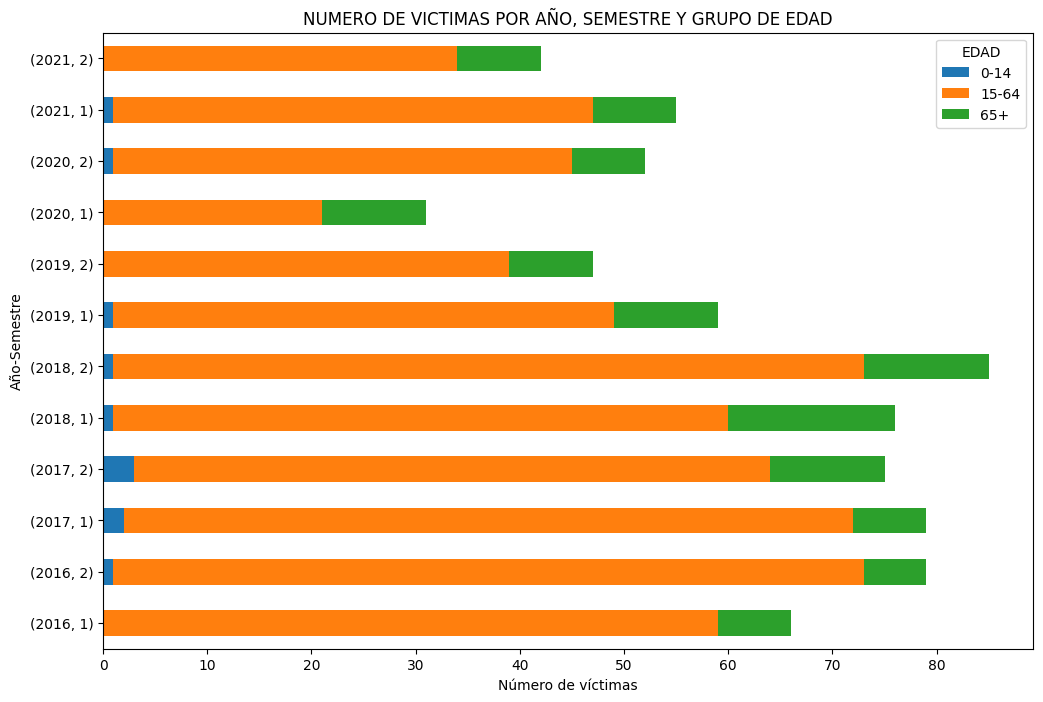

In [19]:
bins = [0, 14, 64, np.inf]
labels = ['0-14', '15-64', '65+']
victimas_edad = df.groupby(['AAAA', 'SEMESTRE', pd.cut(df['EDAD'], bins=bins, labels=labels)])['N_VICTIMAS'].sum().unstack()
victimas_edad.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('NUMERO DE VICTIMAS POR AÑO, SEMESTRE Y GRUPO DE EDAD')
plt.xlabel('Número de víctimas')
plt.ylabel('Año-Semestre')
plt.show()

**<p>Análisis de la Gráfica 10</p>**
<p>Tendencia Temporal:</p>
<p>Esta gráfica muestra la información de la cantidad de victimas por semestre y año según la edad. Para la edad se realizo una agrupación de datos por grupos poblacionales que ha establecido el gobierno de la Republica de Aregentina, donde los categoriza según la edad así: 0-14, 15-64, >65. Se resalta lo mencionado en anteriores gráficas donde el patrón de tendencia es el mismo que anteriores gráficas.</p>
<p>Edad:</p>
<p>Se denota en la gráfica que la mayor cantidad de victimas se encuentra en un rango de edad de 15-64 años, seguido por el grupo poblacional de mayor a 65 años, esto puede deberse a que como lo menciona el gobierno de la República Argentina, el grupo poblacional de 15-64 años es activa, por lo cual realiza actividades nomadas en la ciudad, en la cambio los otros dos grupos son menos activas en comparación.</p>

Guardamos el Dataframe ya limpio

In [20]:
df.to_csv('Homicidios1.csv', index=False)